<a href="https://colab.research.google.com/github/its-amrita-sarkar-01/Traffic-Jam-Predicting-People-s-Movement-into-Nairobi/blob/main/Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
path = '/content/drive/MyDrive/Colab Notebooks/Demand Prediction for Public Transport/Nairobi transport.csv'
data = pd.read_csv(path)

In [83]:
df = data.copy()
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [84]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [85]:
# payment method analysis
pay_method = df['payment_method'].value_counts()
colors = ['#BBFFFF', '#FFD700']

trace = go.Pie(labels = pay_method.index, 
               values = pay_method, 
               textinfo = 'value',
               marker = dict(colors = colors, 
               line=dict(color = '#000000', 
               width = 2)))

layout = go.Layout(title = 'Proportion of people Mpesa vs Cash', width = 500, height = 500)
fig = go.Figure(data = [trace], layout = layout)
py.iplot(fig, filename='pie_chart_subplots')

In [86]:
# analyzing the car type variable
vehicle_type = df['car_type'].value_counts()
colors = ['#698B22', '#FF6A6A']

trace = go.Pie(labels = vehicle_type.index, 
               values = vehicle_type, 
               textinfo = 'value',
               marker = dict(colors = colors, 
               line=dict(color = '#000000', 
               width = 2)))

layout = go.Layout(title = 'Proportion of people Bus vs Shuttle', width = 500, height = 500)
fig = go.Figure(data = [trace], layout = layout)
py.iplot(fig, filename='pie_chart_subplots')

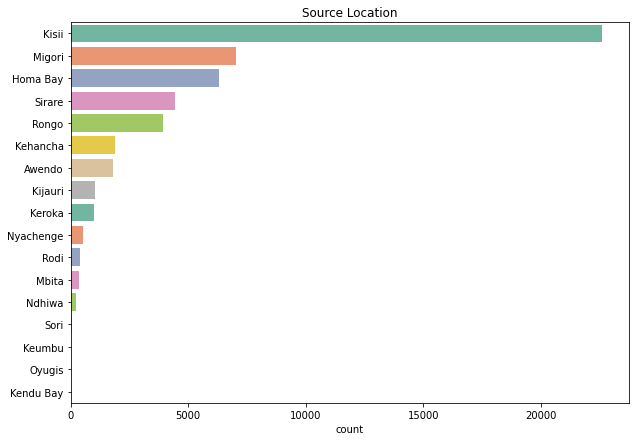

In [87]:
# source location
plt.figure(figsize=(10,7))
travel = df['travel_from'].value_counts()
sns.barplot(travel, travel.index, palette = 'Set2')
plt.title('Source Location')
plt.xlabel('count');

In [88]:
# destination
df['travel_to'].value_counts()

Nairobi    51645
Name: travel_to, dtype: int64

Destination is Nairobi for all the trips.

In [122]:
capacity_of_car = df[['max_capacity', 'car_type']].groupby(['max_capacity', 'car_type']).car_type.count().rename('car_type_count').reset_index()
capacity_of_car

,max_capacity,car_type,car_type_count
0,11,shuttle,19660
1,49,Bus,31985


In [90]:
df['ride_id'].value_counts().to_frame().head()

,ride_id
8454,50
13211,49
10834,49
8090,49
11382,49


In [91]:
df['seat_number'].value_counts().to_frame().head()

,seat_number
1,2065
8,1818
10,1789
2,1784
7,1782


In [92]:
tickets_sold_df = df.groupby(['ride_id']).seat_number.count().rename('number_of_ticket_sold').reset_index()

tickets_sold_df.head()

,ride_id,number_of_ticket_sold
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [93]:
# merge ticket_sold_df dataframe into df 
df = df.merge(tickets_sold_df , how = 'left' ,on = 'ride_id')

In [94]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket_sold
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [95]:
df.drop(['ride_id', 'seat_number', 'payment_method', 'payment_receipt', 'travel_to'], axis = 1, inplace = True)

In [96]:
df.head()

,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket_sold
0,17-10-17,7:15,Migori,Bus,49,1
1,19-11-17,7:12,Migori,Bus,49,1
2,26-11-17,7:05,Keroka,Bus,49,1
3,27-11-17,7:10,Homa Bay,Bus,49,5
4,27-11-17,7:12,Migori,Bus,49,31


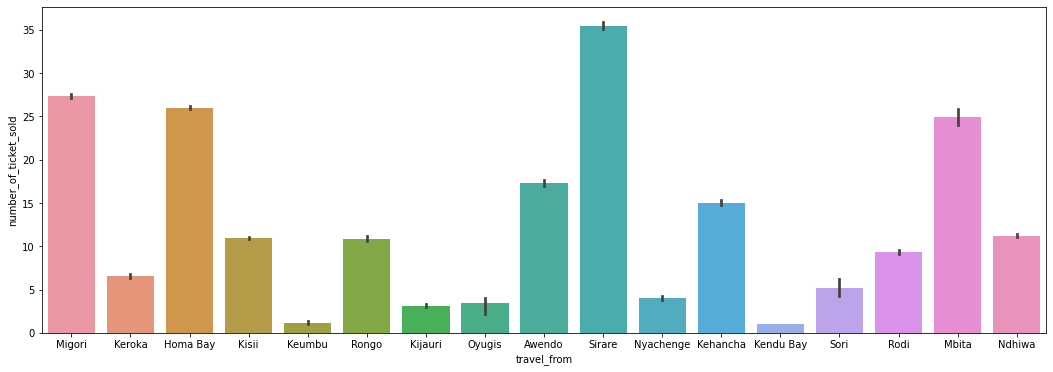

In [97]:
plt.figure(figsize = (18, 6))

sp = sns.barplot(x = 'travel_from', y = 'number_of_ticket_sold', data = df)

In [98]:
df['travel_date'] = pd.to_datetime(df['travel_date'])
df['day_of_month'] = df['travel_date'].dt.day
df['day_of_week'] = df['travel_date'].dt.dayofweek
df['month'] = df['travel_date'].dt.month
df['quarter'] = df['travel_date'].dt.quarter
df['year'] = df['travel_date'].dt.year

In [99]:
df['time'] = pd.to_datetime(df['travel_time'],format= '%H:%M').dt.time
#df['hour'] = df['time'].dt.hour
#df['minute'] = df['minute'].dt.hour

In [100]:
df.head()

,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket_sold,day_of_month,day_of_week,month,quarter,year,time
0,2017-10-17,7:15,Migori,Bus,49,1,17,1,10,4,2017,07:15:00
1,2017-11-19,7:12,Migori,Bus,49,1,19,6,11,4,2017,07:12:00
2,2017-11-26,7:05,Keroka,Bus,49,1,26,6,11,4,2017,07:05:00
3,2017-11-27,7:10,Homa Bay,Bus,49,5,27,0,11,4,2017,07:10:00
4,2017-11-27,7:12,Migori,Bus,49,31,27,0,11,4,2017,07:12:00


In [101]:
df.drop(['travel_date', 'travel_time'], axis = 1, inplace = True)

In [102]:
df.head()

,travel_from,car_type,max_capacity,number_of_ticket_sold,day_of_month,day_of_week,month,quarter,year,time
0,Migori,Bus,49,1,17,1,10,4,2017,07:15:00
1,Migori,Bus,49,1,19,6,11,4,2017,07:12:00
2,Keroka,Bus,49,1,26,6,11,4,2017,07:05:00
3,Homa Bay,Bus,49,5,27,0,11,4,2017,07:10:00
4,Migori,Bus,49,31,27,0,11,4,2017,07:12:00
